Ahmad Luay Adnani

[Linkedin](https://www.linkedin.com/in/ahmadluay/)

[github](https://github.com/ahmadluay9)

# Credit Risk Prediction Model

---

# 1 - Introduction
> This section contains the background , problem statement and objective.


## 1.1 Background


As an intern Data Scientist at ID/X Partners, you will be involved in a project with a lending company. In this project, you will collaborate with various other departments to provide technological solutions for the company. Your task is to build a model that can predict credit risk using a dataset provided by the company, which consists of data on both approved and rejected loan applications. Additionally, you are required to prepare visual media to present the solution to the client. Make sure the visual media you create is clear, easy to read, and communicative.

## 1.2 Problem Statement
The lending company is seeking innovative technological solutions to enhance its credit risk assessment process and improve the accuracy of lending decisions. As an intern Data Scientist at ID/X Partners, you have been assigned to work on this critical project. The company has provided a comprehensive dataset containing information on both approved and rejected loan applications, encompassing various factors such as applicants' financial profiles, credit history, employment status, and more.

Your primary goal is to build a powerful predictive model that can effectively predict credit risk for loan applicants based on the provided dataset. The model should classify applicants into low-risk and high-risk categories, helping the lending company make informed decisions to reduce potential defaults and optimize its loan portfolio management. Given the nature of the credit risk prediction problem, a good model should have high `accuracy, precision, recall, and F1-score`.

## 1.3 Objective
The objective of this project is to develop a robust machine learning model that can accurately predict credit risk for loan applicants based on historical data.

By achieving these objectives, the project aims to provide the lending company with an advanced credit risk prediction model, enabling them to streamline the loan approval process, minimize potential losses, and make well-informed lending decisions. Your contributions will play a vital role in enhancing the company's risk management strategies and fostering financial growth and stability.

---

# 2 - Import Libraries

> This section contains the process of importing libraries and checking the version of the libraries.

## 2.1 Import Libraries

This section explains how to import the libraries that will be used in this notebook. The libraries used include `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly` and `scikit_learn`.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn
import imblearn
import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly

# Handling Missing Values
from sklearn.impute import SimpleImputer
# feature selection
from sklearn.feature_selection import SelectKBest, f_classif
# Train-Test Split, Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Column Transformer
from sklearn.compose import ColumnTransformer
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# Feature Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
# Resampling Imbalance Dataset with Over Sampling
from imblearn.over_sampling import RandomOverSampler

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics for Classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Model Saving
import pickle
import json

# set_options
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

# Palette color
palette = 'rocket'

## 2.2 Libraries Version

This section shows the version of the libraries used in this notebook.

In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('plotly version :',(plotly.__version__))
print('scikit-learn version :',(sklearn.__version__))

pandas version : 1.5.3
numpy version : 1.22.4
matplotlib version : 3.7.1
seaborn version : 0.12.2
plotly version : 5.13.1
scikit-learn version : 1.2.2


---

# 3 - Data Loading

> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## 3.1 Data Loading

This section explains the process of data loading. Dataset containing information on both approved and rejected loan applications, encompassing various factors such as applicants' financial profiles, credit history, employment status, and more.

In [3]:
# Data Loading
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv')

# Displaying the top 5 rows of the dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

Following are the variables and definitions of each column in the dataset.

| Column | Description |
|--------|-------------|
| _rec | The total amount committed by investors for that loan at that point in time. |
| acc_now_delinq | The number of accounts on which the borrower is now delinquent. |
| addr_state | The state provided by the borrower in the loan application. |
| all_util | Balance to credit limit on all trades. |
| annual_inc | The self-reported annual income provided by the borrower during registration. |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration. |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers. |
| collection_recovery_fee | Post-charge-off collection fee. |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections. |
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. |
| desc | Loan description provided by the borrower. |
| dti_joint | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income. |
| earliest_cr_line | The month the borrower's earliest reported credit line was opened. |
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| emp_title | The job title supplied by the Borrower when applying for the loan. |
| Femp | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| fico_range_high | The upper boundary range the borrower’s FICO at loan origination belongs to. |
| fico_range_low | The lower boundary range the borrower’s FICO at loan origination belongs to. |
| funded_amnt | The total amount committed to that loan at that point in time. |
| grade | LC assigned loan grade. |
| home_ownership | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| id | A unique LC assigned ID for the loan listing. |
| il_util | Ratio of total current balance to high credit/credit limit on all installment accounts. |
| initial_list_status | The initial listing status of the loan. Possible values are – Whole, Fractional. |
| inq_fi | Number of personal finance inquiries. |
| inq_last_12m | Number of credit inquiries in the past 12 months. |
| inq_last_6mths | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). |
| installment | The monthly payment owed by the borrower if the loan originates. |
| int_rate | Indicates if income was verified by LC, not verified, or if the income source was verified. |
| is_inc_v | (description missing, please add it if available) |
| issue_d | The month which the loan was funded. |
| last_fico_range_high | The upper boundary range the borrower’s last FICO pulled belongs to. |
| last_fico_range_low | The lower boundary range the borrower’s last FICO pulled belongs to. |
| last_pymnt_amnt | Last total payment amount received. |
| last_pymnt_d | Last month payment was received. |
| loan_amnt | Last month payment was received. |
| loan_status | Current status of the loan. |
| max_bal_bc | Maximum current balance owed on all revolving accounts. |
| member_id | A unique LC assigned ID for the borrower member. |
| mths_since_last_delinq | The number of months since the borrower's last delinquency. |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating. |
| mths_since_last_record | The number of months since the last public record. |
| mths_since_rcnt_il | Months since most recent installment accounts opened. |
| next_pymnt_d | Next scheduled payment date. |
| open_acc | The number of open credit lines in the borrower's credit file. |
| open_acc_6m | Number of open trades in the last 6 months. |
| open_il_12m | (description missing, please add it if available) |
| open_il_24m | Number of installment accounts opened in the past 24 months. |
| open_il_6m | Number of installment accounts opened in the past 12 months. |
| open_rv_12m | Number of revolving trades opened in the past 12 months. |
| open_rv_24m | Number of revolving trades opened in the past 24 months. |
| out_prncp | Remaining outstanding principal for total amount funded. |
| out_prncp_inv | Remaining outstanding principal for a portion of the total amount funded by investors. |
| policy_code | "Publicly available policy_code=1; new products not publicly available policy_code=2". |
| pub_rec | Number of derogatory public records. |
| purpose | A category provided by the borrower for the loan request. Indicates if a payment plan has been put in place for the loan. |
| recoveries | Indicates if a payment plan has been put in place for the loan. |
| revol_bal | Total credit revolving balance. |
| revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| sub_grade | LC assigned loan subgrade. |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| title | The loan title provided by the borrower. |
| tot_coll_amt | Total collection amounts ever owed. |
| tot_cur_bal | Total current balance of all accounts. |
| total_acc | The total number of credit lines currently in the borrower's credit file. |
| total_bal_il | Total current balance of all installment accounts. |
| total_cu_tl | Number of finance trades. |
| total_pymnt | Payments received to date for the total amount funded. |
| total_pymnt_inv | Payments received to date for a portion of the total amount funded by investors. |
| total_rec_int | Interest received to date. |
| total_rec_late_fee | Late fees received to date. |
| total_rec_prncp | Principal received to date. |
| total_rev_hi_lim | Total revolving high credit/credit limit. |
| url | URL for the LC page with listing data. |
| verified_status_joint | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified. |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application. |


## 3.2 Size of Dataset
The shape attribute is helpful to quickly check the size of your DataFrame, especially when dealing with large datasets.

In [4]:
# size of dataset
df.shape

(466285, 75)

## 3.3 Information

Displays the following information about the dataset:

**Data Types:** It shows the data type of each column in the DataFrame. This includes numeric types (integers and floats), object types (usually strings), and categorical types, among others.

**Non-null Count:** It shows the number of non-null (non-missing) values in each column. This gives you an idea of whether there are any missing values in the dataset.

**Memory Usage:** It provides an estimation of the memory used by the DataFrame. This is useful to understand the memory footprint of your data, especially for large datasets.

In [5]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 3.4 Checking for duplicated data

Checking for duplicated data is an essential step in data analysis and data preprocessing. Identifying and handling duplicated data is crucial because it can lead to biased results, incorrect statistical analysis, and overfitting in machine learning models.

In [6]:
# Check for duplicated entries
df.duplicated().value_counts()

False    466285
dtype: int64

There is no duplicated data in this dataset.

---

# 4 - Exploratory Data Analysis

> This section contains data exploration of the dataset.

## 4.1 Drop Columns

The dropped columns is the one that contains irrelevant or unnecessary information and has too many missing values.
- The columns `Unnamed: 0`, `id`, and `member_id` were dropped because they serve as unique identifiers for each member or individual in the dataset. In many cases, these columns are not useful for analysis as they simply provide a unique identifier for each record and do not **contain any meaningful information** relevant to the analysis.
- `annual_inc_joint`,`dti_joint`,`verification_status_joint`,`open_acc_6m`,`open_il_6m`,`open_il_12m`,`open_il_24m`,`mths_since_rcnt_il`,`total_bal_il`,`il_util`,`open_rv_12m`,`open_rv_24m`,`max_bal_bc`,`all_util`,`inq_fi`,`total_cu_tl`, and `inq_last_12m` were dropped because they have **too many missing values**.
- `emp_title`, `url`, `desc`, `title`, `zip_code` and  `application_type` were dropped because they **do not contain any relevant information** that can contribute to the analysis or modeling process.
- `sub_grade` has the same meaning as `grade`.

In [7]:
# create a copy of the dataset
df_eda = df.copy()

# Drop Columns
df_eda = df_eda.drop(['Unnamed: 0','id','member_id','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'application_type'],axis=1)
df_eda.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN


## 4.2 Loan Status - Credit Risk

In this section, an Exploratory Data Analysis (EDA) is performed to identify the unique values in the `loan_status` column. Then, a new column called `credit_risk` is created, which contains the credit risk score based on the loan status for each loan applicant.

In [8]:
# Number of Unique Values
df_eda.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Generally, in the context of a loan dataset or credit risk analysis, **Current,Fully Paid,In Grace Period** are often associated with lower credit risk:

- **Current**: In the context of loan status, 'Current' refers to loans that are currently being repaid on time, and the borrowers are up-to-date with their payments. Since these borrowers are making timely payments, they are less likely to be classified as high-risk borrowers.

- **Fully Paid**: Borrowers whose loans are 'Fully Paid' have successfully repaid their loans in full, which indicates responsible financial behavior. Such borrowers are typically considered low-risk since they have met their loan obligations.

- **In Grace Period**: 'In Grace Period' status means that the borrower has a short period of time (grace period) to make a payment after the due date without incurring any penalties or being marked as delinquent. While they are technically not current on their payments during this period, they are not yet considered delinquent or in default. Hence, they are often treated as low-risk since they are still within the grace period.

In [9]:
# Loan Status based on credit risk
low_risk = ['Current','Fully Paid','In Grace Period','Does not meet the credit policy. Status:Fully Paid']
df_eda['credit_risk'] = np.where(df_eda['loan_status'].isin(low_risk),1,0) # 1 = Low-Risk, 0 = High-Risk
df_eda['credit_risk_cat'] = np.where(df_eda['loan_status'].isin(low_risk),'Low-Risk','High-Risk') # 1 = Low-Risk, 0 = High-Risk
df_eda['credit_risk'].value_counts()

1    414099
0     52186
Name: credit_risk, dtype: int64

<Figure size 3000x1500 with 0 Axes>

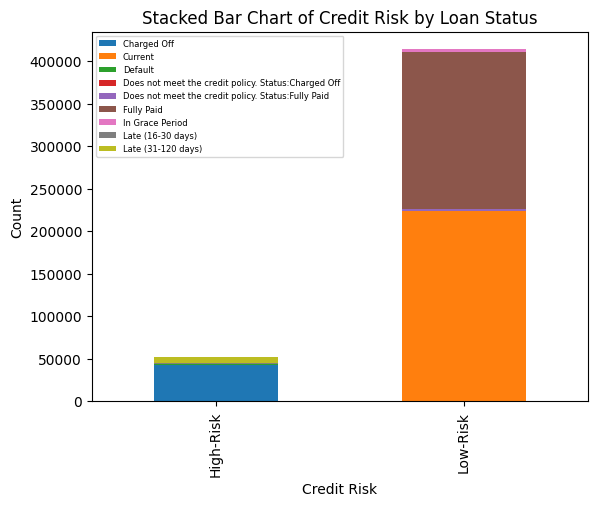

In [10]:
# Create a new dataframe only consist of loan_status & credit_risk
credit_risk = df_eda[['credit_risk_cat', 'loan_status']]

# Get the count of each unique value in 'credit_risk' for each 'loan_status'
grouped_data = credit_risk.groupby('credit_risk_cat')['loan_status'].value_counts().unstack(fill_value=0)

# Create the stacked bar chart
plt.figure(figsize=(30, 15))
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Credit Risk by Loan Status')

# Decrease legend font size
plt.legend(fontsize=6)

# Show the plot
plt.show()

From the visualization above we can see that `credit_risk` column exhibits an imbalanced class distribution, with a larger number of borrowers categorized as **Low risk** compared to **High risk** borrowers. This imbalance indicates that the dataset contains more instances of **Low risk** borrowers, which may have implications for building a predictive model or making decisions based on this data.

The presence of imbalanced classes can impact the model's performance, especially if the minority class (**High risk** borrowers) is of particular interest and needs to be accurately identified. In such cases, addressing the class imbalance becomes crucial to ensure that the model can effectively detect instances of the minority class.

Appropriate techniques for handling imbalanced data, such as resampling methods, can be considered to improve the model's performance on predicting **High risk** borrowers accurately.

## 4.3 Convert to datetime format

The column `issue_d`,`earliest_cr_line`,`last_pymnt_d`,`next_pymnt_d`, and `last_credit_pull_d` appear to be in the 'datetime' format when examining the data, but based on the information about their data types, they are classified as 'object'. Therefore, these columns will be converted into the 'datetime' format. Converting these columns to datetime format makes it easier to work with date-related data and unlocks a wide range of analysis and visualization possibilities.

In [11]:
# datetime columns
df_eda[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16


In [12]:
# info
df_eda[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   issue_d             466285 non-null  object
 1   earliest_cr_line    466256 non-null  object
 2   last_pymnt_d        465909 non-null  object
 3   next_pymnt_d        239071 non-null  object
 4   last_credit_pull_d  466243 non-null  object
dtypes: object(5)
memory usage: 17.8+ MB


The conversion of columns to datetime format is done using the `pandas.to_datetime()` function.

In [13]:
# Convert to Datetime Format
df_eda['issue_d'] = pd.to_datetime(df_eda['issue_d'], format = '%b-%y')
df_eda['earliest_cr_line'] = pd.to_datetime(df_eda['earliest_cr_line'], format = '%b-%y')
df_eda['last_pymnt_d'] = pd.to_datetime(df_eda['last_pymnt_d'], format = '%b-%y')
df_eda['next_pymnt_d'] = pd.to_datetime(df_eda['next_pymnt_d'], format = '%b-%y')
df_eda['last_credit_pull_d'] = pd.to_datetime(df_eda['last_credit_pull_d'], format = '%b-%y')

df_eda[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,NaT,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,NaT,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-02-01,2016-01-01


In [14]:
# showing information from the dataset
df_eda[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   issue_d             466285 non-null  datetime64[ns]
 1   earliest_cr_line    466256 non-null  datetime64[ns]
 2   last_pymnt_d        465909 non-null  datetime64[ns]
 3   next_pymnt_d        239071 non-null  datetime64[ns]
 4   last_credit_pull_d  466243 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 17.8 MB


From the information above we can see that data types now in datetime format.

## 4.4 Data Type

Knowing the type of data is crucial in data analysis and processing because it allows you to apply appropriate operations, understand the nature of the data, and select the right analysis methods.

In [15]:
# Get Numeric Columns and Categorical Columns
num_columns = df_eda.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_eda.select_dtypes(include=['object']).columns.tolist()
datetime_columns = df_eda.select_dtypes(include='datetime').columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)
print('DateTime Columns : ', datetime_columns)

Numeric Columns :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_risk']
Categorical Columns :  ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'credit_risk_cat']
DateTime Columns :  ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


## 4.5 Univariate Analysis

Univariate analysis is a type of statistical analysis that focuses on examining and summarizing the characteristics and patterns of a single variable in a dataset. It involves analyzing the data of one variable at a time, without considering the relationship with other variables. The main goal of univariate analysis is to gain insights into the distribution, central tendency, spread, and shape of the data for that particular variable.

### a. Numeric Column

#### Descriptive Stastistics


Performing descriptive statistics on numeric data is essential for gaining insights into the distribution, central tendency, variability, and other characteristics of the data.

In [16]:
# Stastistical Descriptive
df_eda.describe().round(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
count,466285.00,466285.00,466285.00,466285.00,466285.00,466281.00,466285.00,466256.00,466256.00,215934.00,62638.00,466256.00,466256.00,466285.00,465945.00,466256.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466140.00,98974.00,466285.0,466256.00,396009.00,396009.00,396009.00,466285.00
mean,14317.28,14291.80,14222.33,13.83,432.06,73277.38,17.22,0.28,0.80,34.10,74.31,11.19,0.16,16230.20,56.18,25.06,4410.06,4408.45,11540.69,11469.89,8866.01,2588.68,0.65,85.34,8.96,3123.91,0.01,42.85,1.0,0.00,191.91,138801.71,30379.09,0.89
std,8286.51,8274.37,8297.64,4.36,243.49,54963.57,7.85,0.80,1.09,21.78,30.36,4.99,0.51,20676.25,23.73,11.60,6355.08,6353.20,8265.63,8254.16,7031.69,2483.81,5.27,552.22,85.49,5554.74,0.11,21.66,0.0,0.07,14630.21,152114.66,37247.13,0.32
min,500.00,500.00,0.00,5.42,15.67,1896.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,8000.00,8000.00,8000.00,10.99,256.69,45000.00,11.36,0.00,0.00,16.00,53.00,8.00,0.00,6413.00,39.20,17.00,0.00,0.00,5552.13,5499.25,3708.56,957.28,0.00,0.00,0.00,312.62,0.00,26.00,1.0,0.00,0.00,28618.00,13500.00,1.00
50%,12000.00,12000.00,12000.00,13.66,379.89,63000.00,16.87,0.00,0.00,31.00,76.00,10.00,0.00,11764.00,57.60,23.00,441.47,441.38,9419.25,9355.43,6817.76,1818.88,0.00,0.00,0.00,545.96,0.00,42.00,1.0,0.00,0.00,81539.00,22800.00,1.00
75%,20000.00,20000.00,19950.00,16.49,566.58,88960.00,22.78,0.00,1.00,49.00,102.00,14.00,0.00,20333.00,74.70,32.00,7341.65,7338.39,15308.16,15231.31,12000.00,3304.53,0.00,0.00,0.00,3187.51,0.00,59.00,1.0,0.00,0.00,208953.00,37900.00,1.00
max,35000.00,35000.00,35000.00,26.06,1409.99,7500000.00,39.99,29.00,33.00,188.00,129.00,84.00,63.00,2568995.00,892.30,156.00,32160.38,32160.38,57777.58,57777.58,35000.03,24205.62,358.68,33520.27,7002.19,36234.44,20.00,188.00,1.0,5.00,9152545.00,8000078.00,9999999.00,1.00


#### Histogram and Box Plot

Histogram and box plot are two important visualization tools used in data analysis and exploratory data analysis (EDA) to understand the distribution and characteristics of a dataset. A histogram is used to visualize the distribution of a continuous variable. A box plot is used to display the distribution of a continuous variable and to visualize the summary statistics (such as median, quartiles, and potential outliers) in a compact manner.

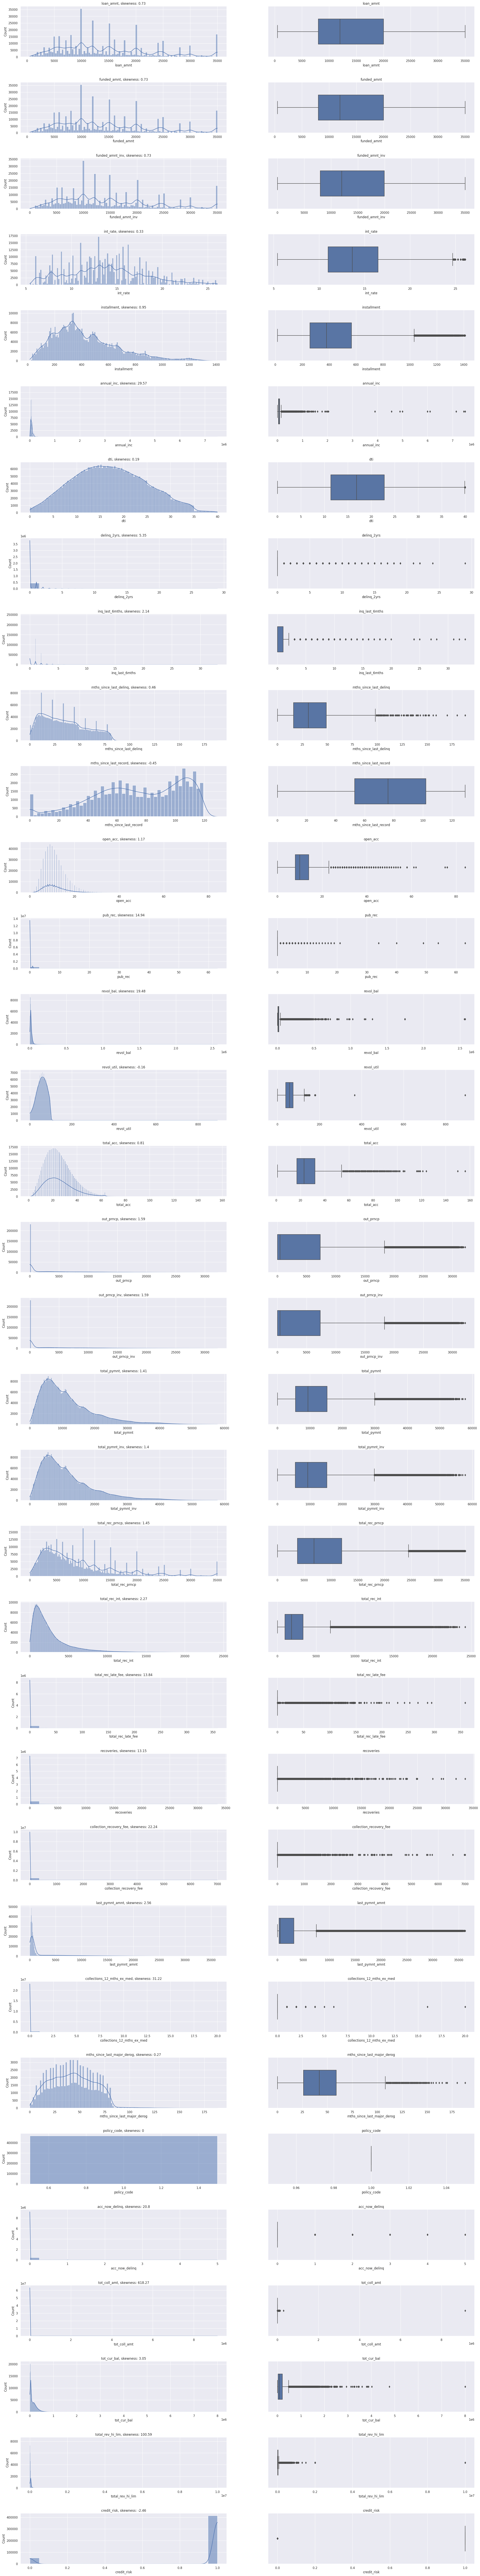

In [17]:
# plot histogram and boxplot
df_eda_num = df_eda[num_columns]
n=len(df_eda_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30, n * 5))
for i in range(n):
    col = df_eda_num.columns[i]
    sns.histplot(ax=ax[i,0],data=df_eda_num[col],kde=True)
    ax[i,0].set_title(f'{col}, skewness: {round(df_eda_num[col].skew(),2)}')
    sns.boxplot(ax=ax[i,1],data=df_eda_num,x=df_eda_num[col],width=0.50)
    ax[i,1].set_title(col)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [65]:
# Outlier

# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)

  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

# Distribution of Data
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Distribution of {col} : Normal Distribution')
  elif skewness<=-0.5:
    print(f'Distribution of {col} : Left Skewed')
  else:
    print(f'Distribution of {col} : Right Skewed')

# percentage of outlier
for i in range(n):
    col = df_eda_num.columns[i]
    out,no_out, up, low = outlier_analysis (df_eda_num,col)
    print(f'column name: {col}')
    skewness (df_eda_num,col)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', round(((len(out) / len(df_eda_num))) * 100, 2), '%')
    print('skewness: ',round(df_eda_num[col].skew(),2))
    print('-'*20)

column name: loan_amnt
Distribution of loan_amnt : Right Skewed
count of outlier:  0
percentage of outlier:  0.0 %
skewness:  0.73
--------------------
column name: funded_amnt
Distribution of funded_amnt : Right Skewed
count of outlier:  0
percentage of outlier:  0.0 %
skewness:  0.73
--------------------
column name: funded_amnt_inv
Distribution of funded_amnt_inv : Right Skewed
count of outlier:  0
percentage of outlier:  0.0 %
skewness:  0.73
--------------------
column name: int_rate
Distribution of int_rate : Normal Distribution
count of outlier:  0
percentage of outlier:  0.0 %
skewness:  0.33
--------------------
column name: installment
Distribution of installment : Right Skewed
count of outlier:  11711
percentage of outlier:  2.51 %
skewness:  0.95
--------------------
column name: annual_inc
Distribution of annual_inc : Right Skewed
count of outlier:  19899
percentage of outlier:  4.27 %
skewness:  29.57
--------------------
column name: dti
Distribution of dti : Normal Dist

We can gather several insights:
1. Interest Rate (`int_rate`):
  - The average interest rate is approximately 13.83%, with a standard deviation of 4.36%. This indicates some variability in the interest rates offered to borrowers.
  - The minimum interest rate is 5.42%, while the maximum is 26.06%. This suggests a diverse range of interest rates in the dataset.
2. Outstanding Principal (`out_prncp`):
  - The average outstanding principal is approximately 4,410.06, with a standard deviation of 6,355.08. This indicates variability in the outstanding principal amounts for loans.
  - The minimum outstanding principal is 0.00, indicating that some borrowers have fully repaid their loans.
  - The maximum outstanding principal is 32,160.38, suggesting that some borrowers have significant loan balances.
3. Total Payments (`total_pymnt`):
  - The average total payments amount is approximately 11,540.69, with a standard deviation of 8,265.63.
  - The minimum total payments amount is 0.00, which may indicate loans that have not received any payments yet.
  - The maximum total payments amount is 57,777.58, indicating substantial payments received for certain loans.
4. Total Payments Invested (`total_pymnt_inv`):
  - The average total payments invested amount is slightly lower than `total_pymnt`, approximately 11,469.89, with a similar standard deviation of 8,254.16.
5. Total Received Principal (`total_rec_prncp`):
  - The average total received principal is approximately 8,866.01, with a standard deviation of 7,031.69.
  - The minimum total received principal is 0.00, indicating loans that have not received any principal payments yet.
  - The maximum total received principal is 35,000.03, suggesting significant repayments for some loans.
6. Late Fee (`total_rec_late_fee`):
  - The average late fee amount is approximately 0.65, with a standard deviation of 5.27.
  - Most loans have no late fees (25%, 50%, and 75% values are 0).
7. Recoveries (`recoveries`) and Collection Recovery Fee (`collection_recovery_fee`):

  - The average recoveries amount is approximately 85.34, with a standard deviation of 552.22. Similarly, the average collection recovery fee is 8.96, with a standard deviation of 85.49.
  - Both recoveries and collection recovery fees are relatively low on average, but some loans may have higher values.

8. Last Payment Amount (`last_pymnt_amnt`):

  - The average last payment amount is approximately 3,123.91, with a standard deviation of 5,554.74.
  - The minimum last payment amount is 0.00, indicating loans that have not received any payments yet.
  - The maximum last payment amount is 36,234.44, suggesting substantial final payments for certain loans.

### b. Categorical Column

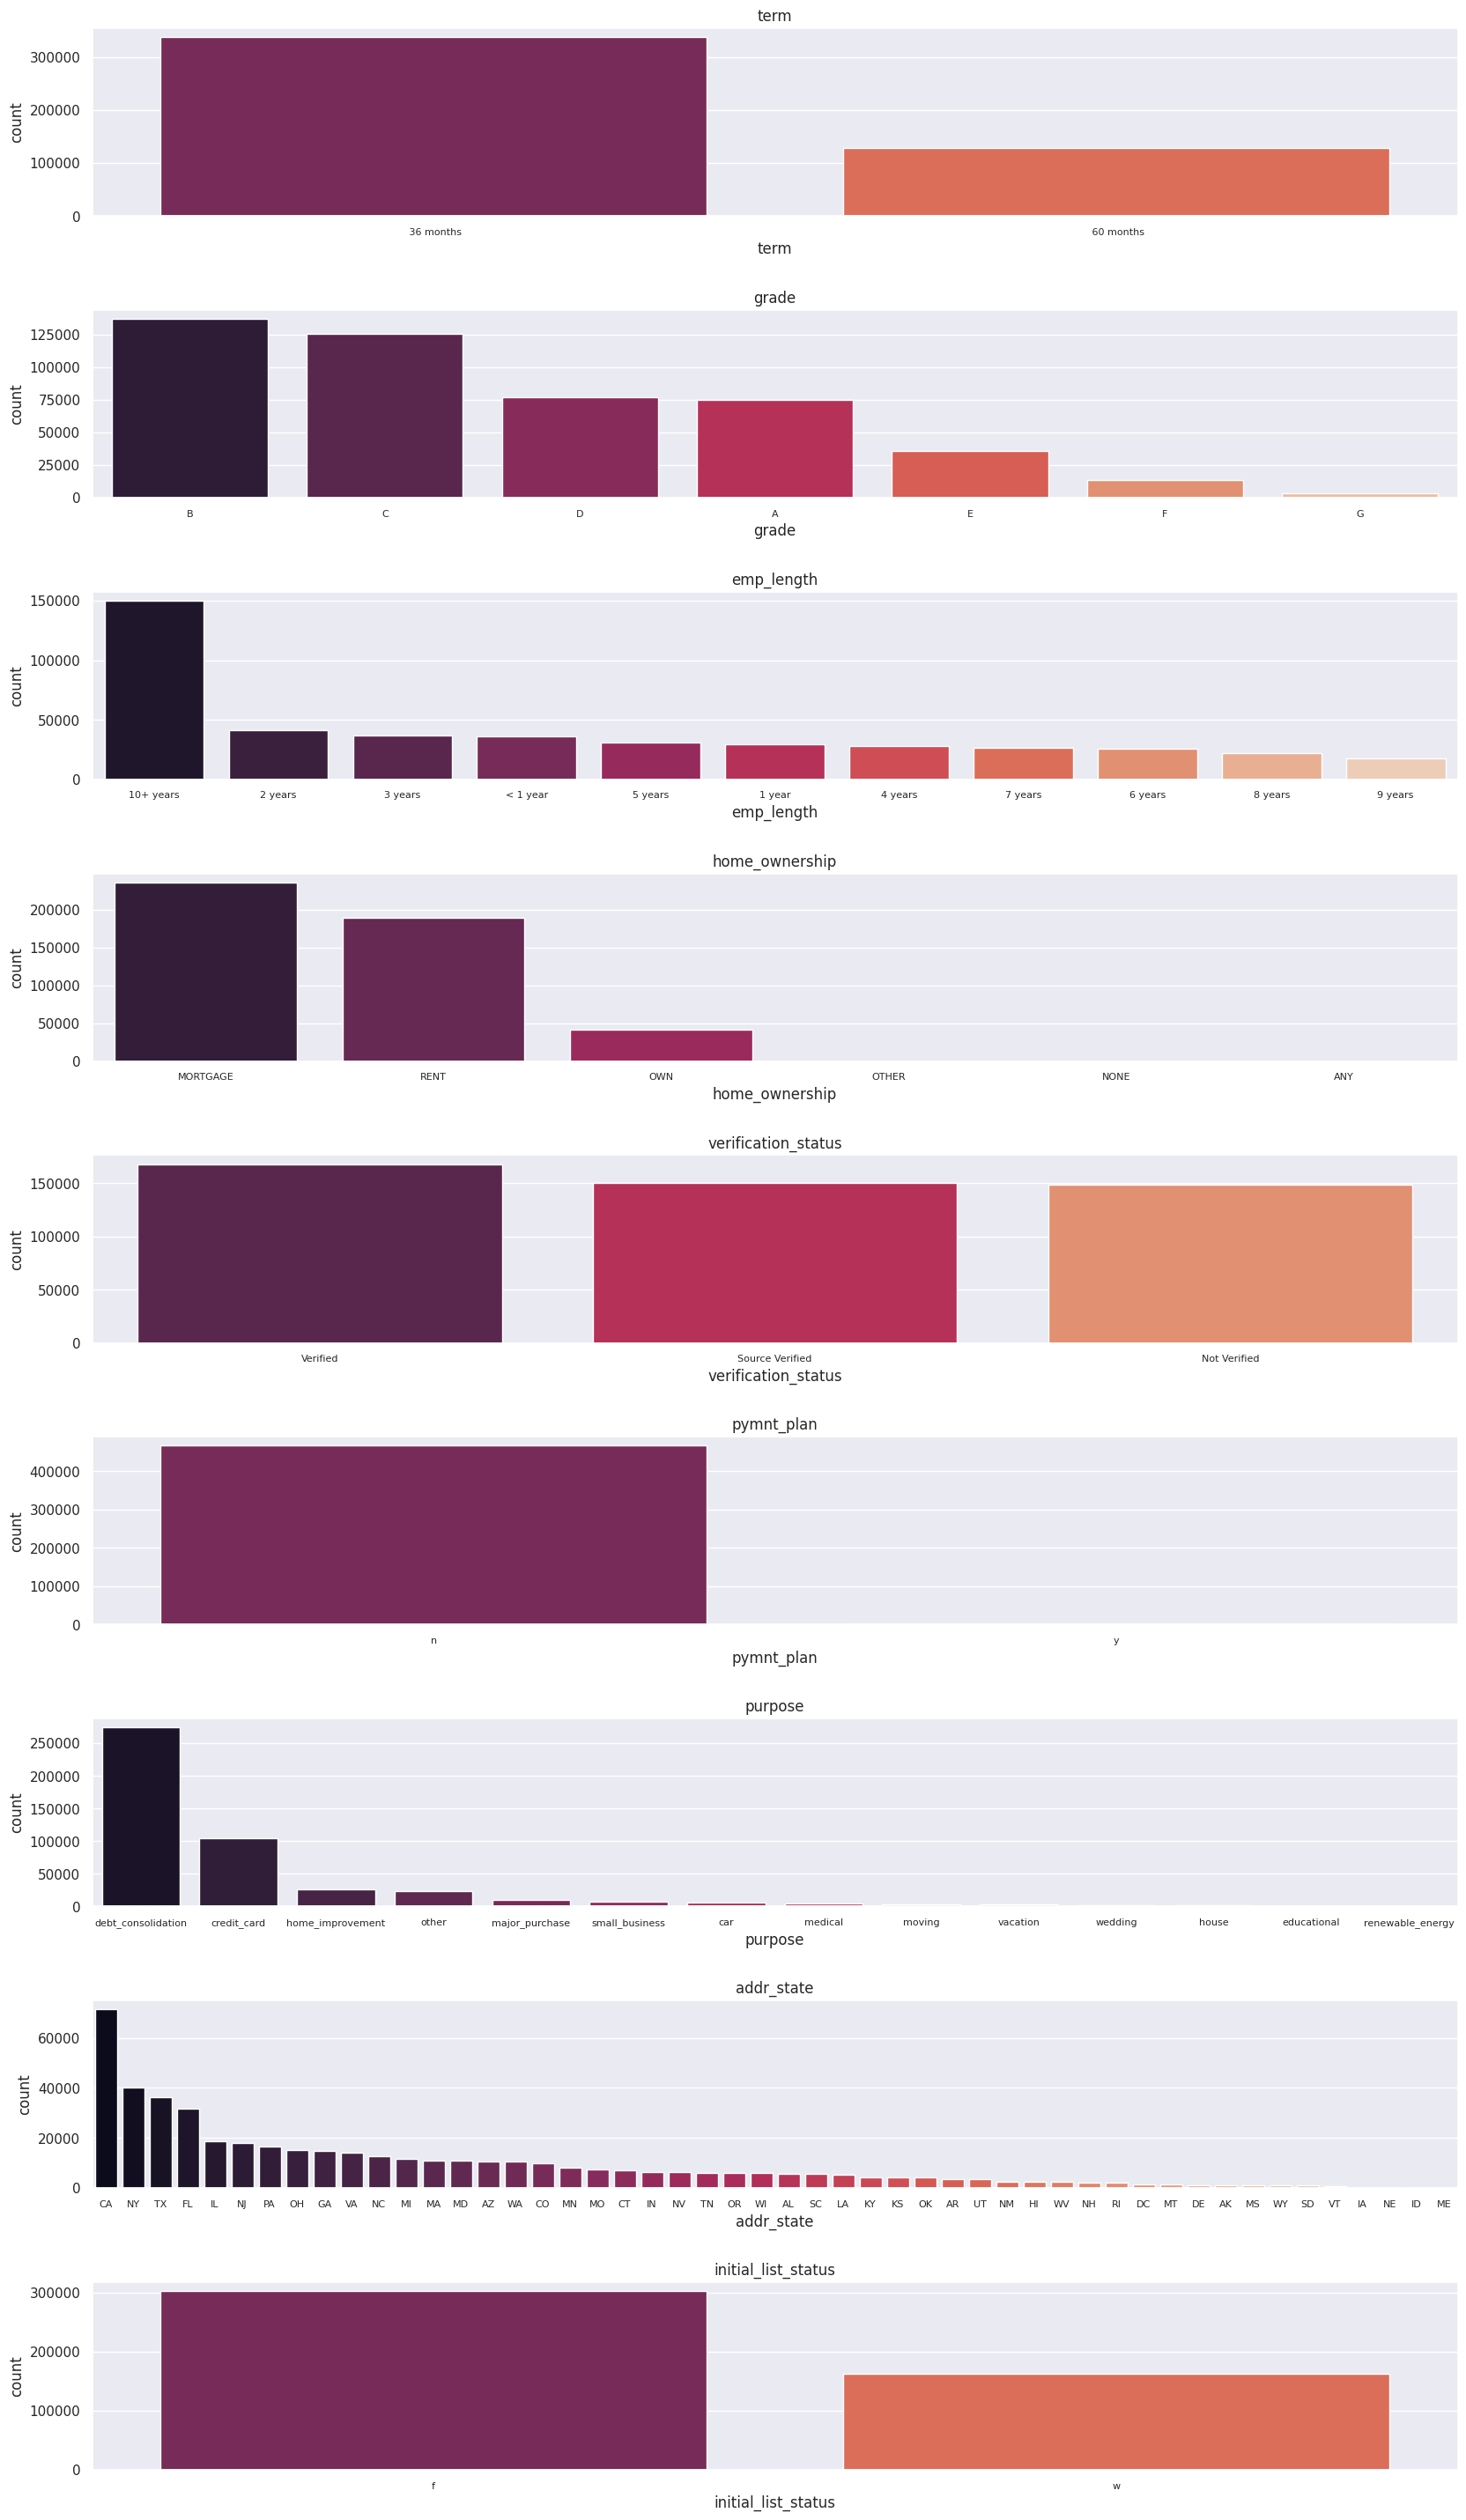

In [19]:
# countplot
df_eda_cat = df_eda[cat_columns]
df_eda_cat = df_eda_cat.drop(['loan_status','credit_risk_cat'],axis=1)
n=len(df_eda_cat.columns)
fig, ax = plt.subplots(n,1,figsize=(20,n*4))

for i in range(n):
    col = df_eda_cat.columns[i]
    sorted_counts = df_eda_cat[col].value_counts().sort_values(ascending=False)
    sns.countplot(ax=ax[i],x=df_eda_cat[col],order=sorted_counts.index,palette = palette).set_title(f'{col}')
    ax[i].tick_params(axis='x', labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [20]:
# Count for each unique values
value_counts_list = []
n=len(df_eda_cat.columns)
for i in range(n):
    col = df_eda_cat.columns[i]
    value_counts = df[col].value_counts().sort_values(ascending=False)
    value_counts_list.append((col, value_counts))

for column, counts in value_counts_list:
    print(f"Value counts for column '{column}':\n{counts}")
    print('-'*50)

Value counts for column 'term':
 36 months    337953
 60 months    128332
Name: term, dtype: int64
--------------------------------------------------
Value counts for column 'grade':
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
--------------------------------------------------
Value counts for column 'emp_length':
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
--------------------------------------------------
Value counts for column 'home_ownership':
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
--------------------------------------------------
Value counts for column 'verification_status':
Verified           168055
S

Insights from the value counts of each column:

1. Loan Term: The majority of loans have a term of 36 months, accounting for approximately 72.5% of the dataset. This indicates that borrowers generally prefer shorter loan durations, which might be due to the desire to repay the loan faster and reduce the overall interest paid.

2. Loan Grade: The most common loan grade is 'B', followed closely by 'C'. This suggests that the majority of borrowers fall into the 'B' and 'C' risk categories, which might indicate that the lending platform is relatively cautious in offering loans to higher-risk borrowers (grades D to G).

3. Employment Length: Borrowers with over 10 years of employment history constitute the largest group (approximately 32.2%), showing that the platform is serving borrowers with stable job histories, which could be perceived as lower-risk applicants.

4. Home Ownership: The highest number of borrowers have "MORTGAGE" as their home ownership status, comprising approximately 50.6% of the dataset. This could indicate that homeowners are more likely to apply for loans or that the lending platform targets homeowners.

5. Verification Status: Loans with "Verified" status are slightly more common than "Source Verified" and "Not Verified" statuses, suggesting that borrowers with verified financial information are more likely to obtain loans from the platform.

6. Payment Plan: The overwhelming majority of loans (approximately 99.99%) do not have a payment plan, implying that the platform typically does not offer payment plans to borrowers.

7. Loan Purpose: The most frequent loan purpose is "debt_consolidation," indicating that many borrowers seek to consolidate their existing debts into a single loan. This could suggest that the platform is successful in offering competitive interest rates for debt consolidation.

8. State Distribution: The states with the highest number of borrowers are California, New York, Texas, Florida, and Illinois, which are among the most populous states. This indicates that the lending platform is widely used across different regions.

9. Initial List Status: Most loans are initially listed with a status of 'f', followed by 'w'. This might indicate that the majority of loans are quickly funded, as they are fully funded by investors before being listed on the platform.

### c. Datetime Column

In [21]:
# describe
df_eda_date = df_eda[datetime_columns]
df_eda_date.describe()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466285,466256,465909,239071,466243
unique,91,664,98,100,103
top,2014-10-01 00:00:00,2000-10-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,38782,3674,179620,208393,327699
first,2007-06-01 00:00:00,1969-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
last,2014-12-01 00:00:00,2068-12-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


<Figure size 1200x800 with 0 Axes>

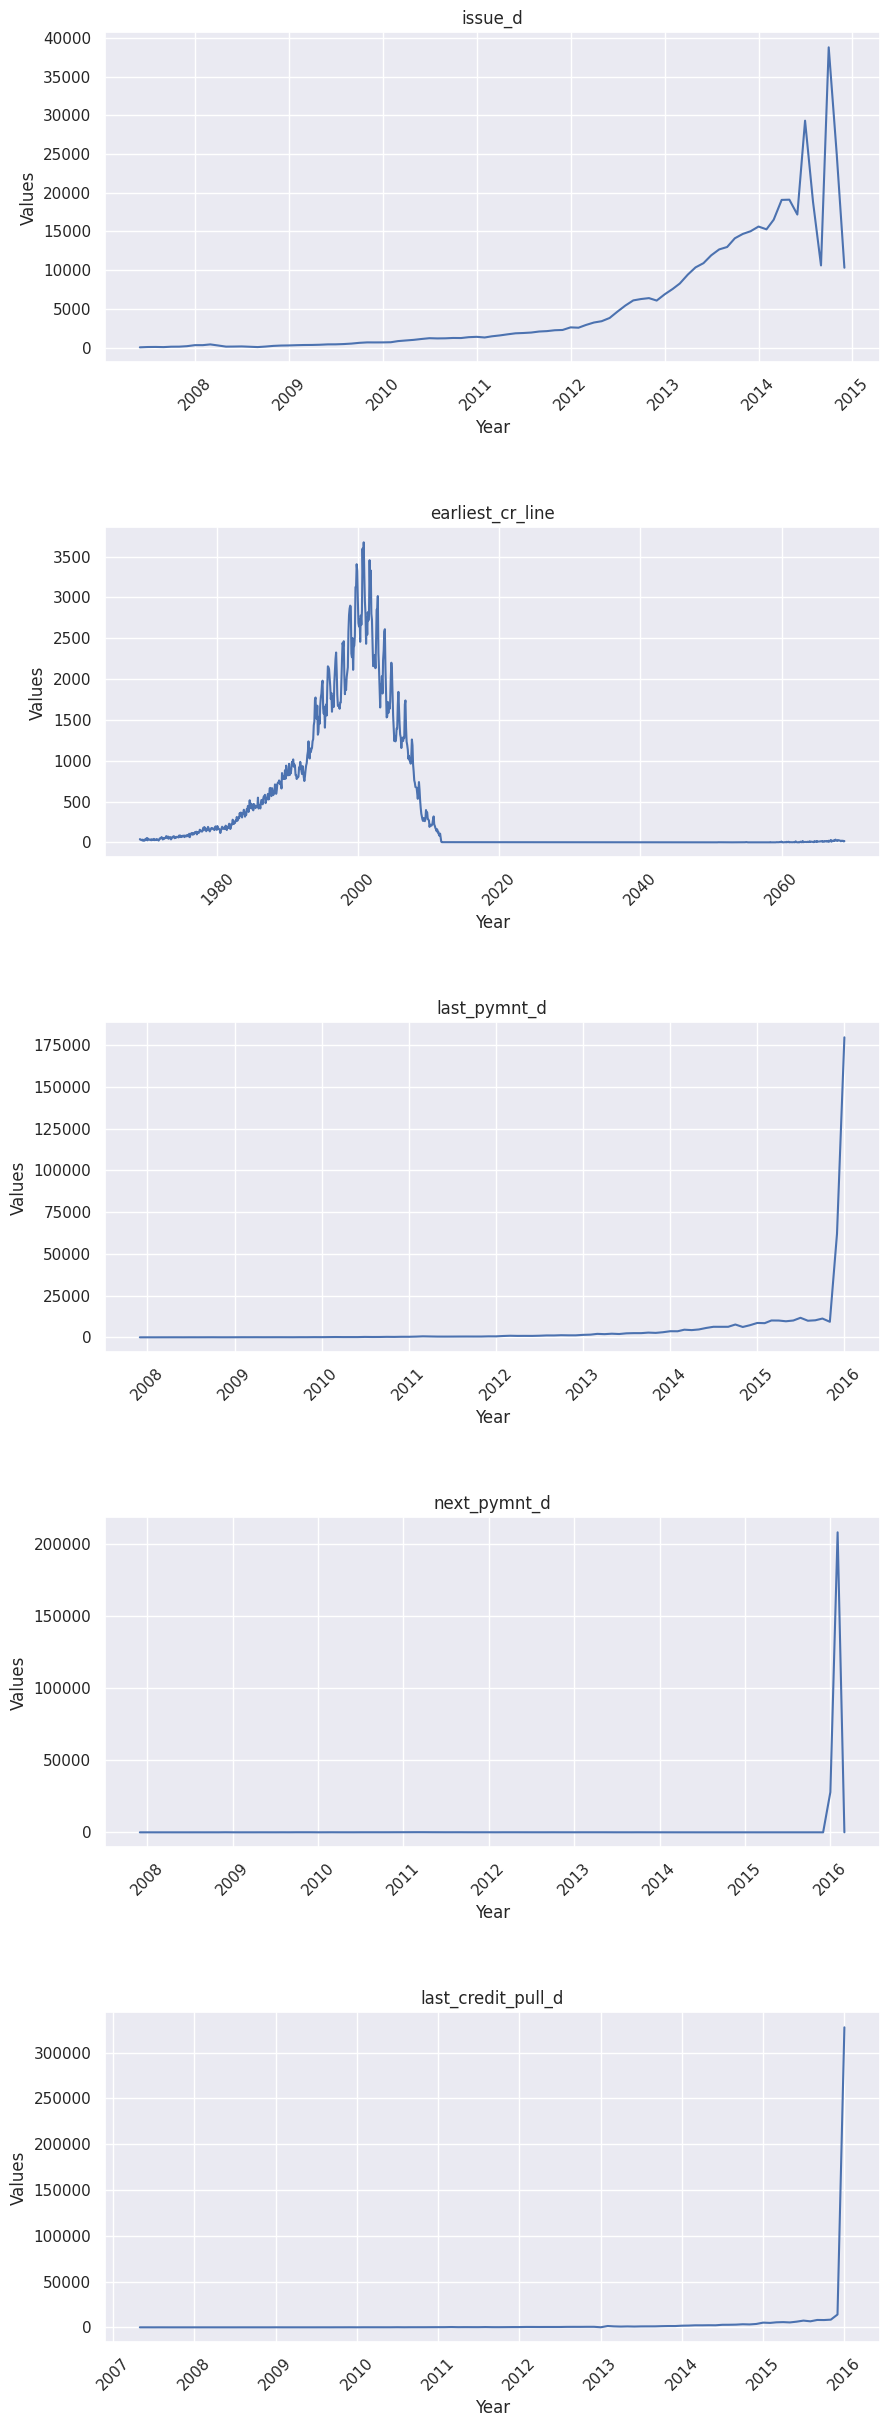

In [22]:
# Create the line charts
plt.figure(figsize=(12, 8))
n=len(df_eda_date.columns)
fig, axs = plt.subplots(n, 1, figsize=(10, n * 6))
for i in range (n):
    col = df_eda_date.columns[i]
    date_counts = df_eda[col].value_counts().sort_index()
    axs[i].plot(date_counts.index, date_counts.values, linestyle='-', color='b')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'{col}')
    axs[i].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.grid(True)
plt.show()

Insights from visualization above:

1. Loan Issuance Trend: The dataset includes loans issued over a period of approximately seven years, from June 2007 to December 2014. The loan issuance reached its peak in October 2014, with 38,782 loans issued. This trend can provide valuable information about the platform's loan growth over time and identify potential seasonality or trends in loan applications.

2. Borrower Credit History: The earliest credit line available in the dataset dates back to January 1969, indicating that the lending platform serves borrowers with a wide range of credit histories, including those with a long credit history. This diversity in credit histories might contribute to the platform's ability to cater to borrowers with varying creditworthiness.

3. Last Payment and Next Payment Dates: The dataset includes information on the last payment date and the next payment date for the borrowers. However, it appears that not all loans have information for these columns, as indicated by the different counts. This could suggest that some borrowers have fully repaid their loans, while others might have deferred or missed their payments.

4. Last Credit Pull Date: The dataset provides information on the date of the last credit pull for each borrower. This information is crucial for the lending platform to keep track of borrowers' creditworthiness and assess their credit risk before offering new loans or credit products.

## 4.6 Multivariate Analysis

### Categorical Columns and Credit Risk

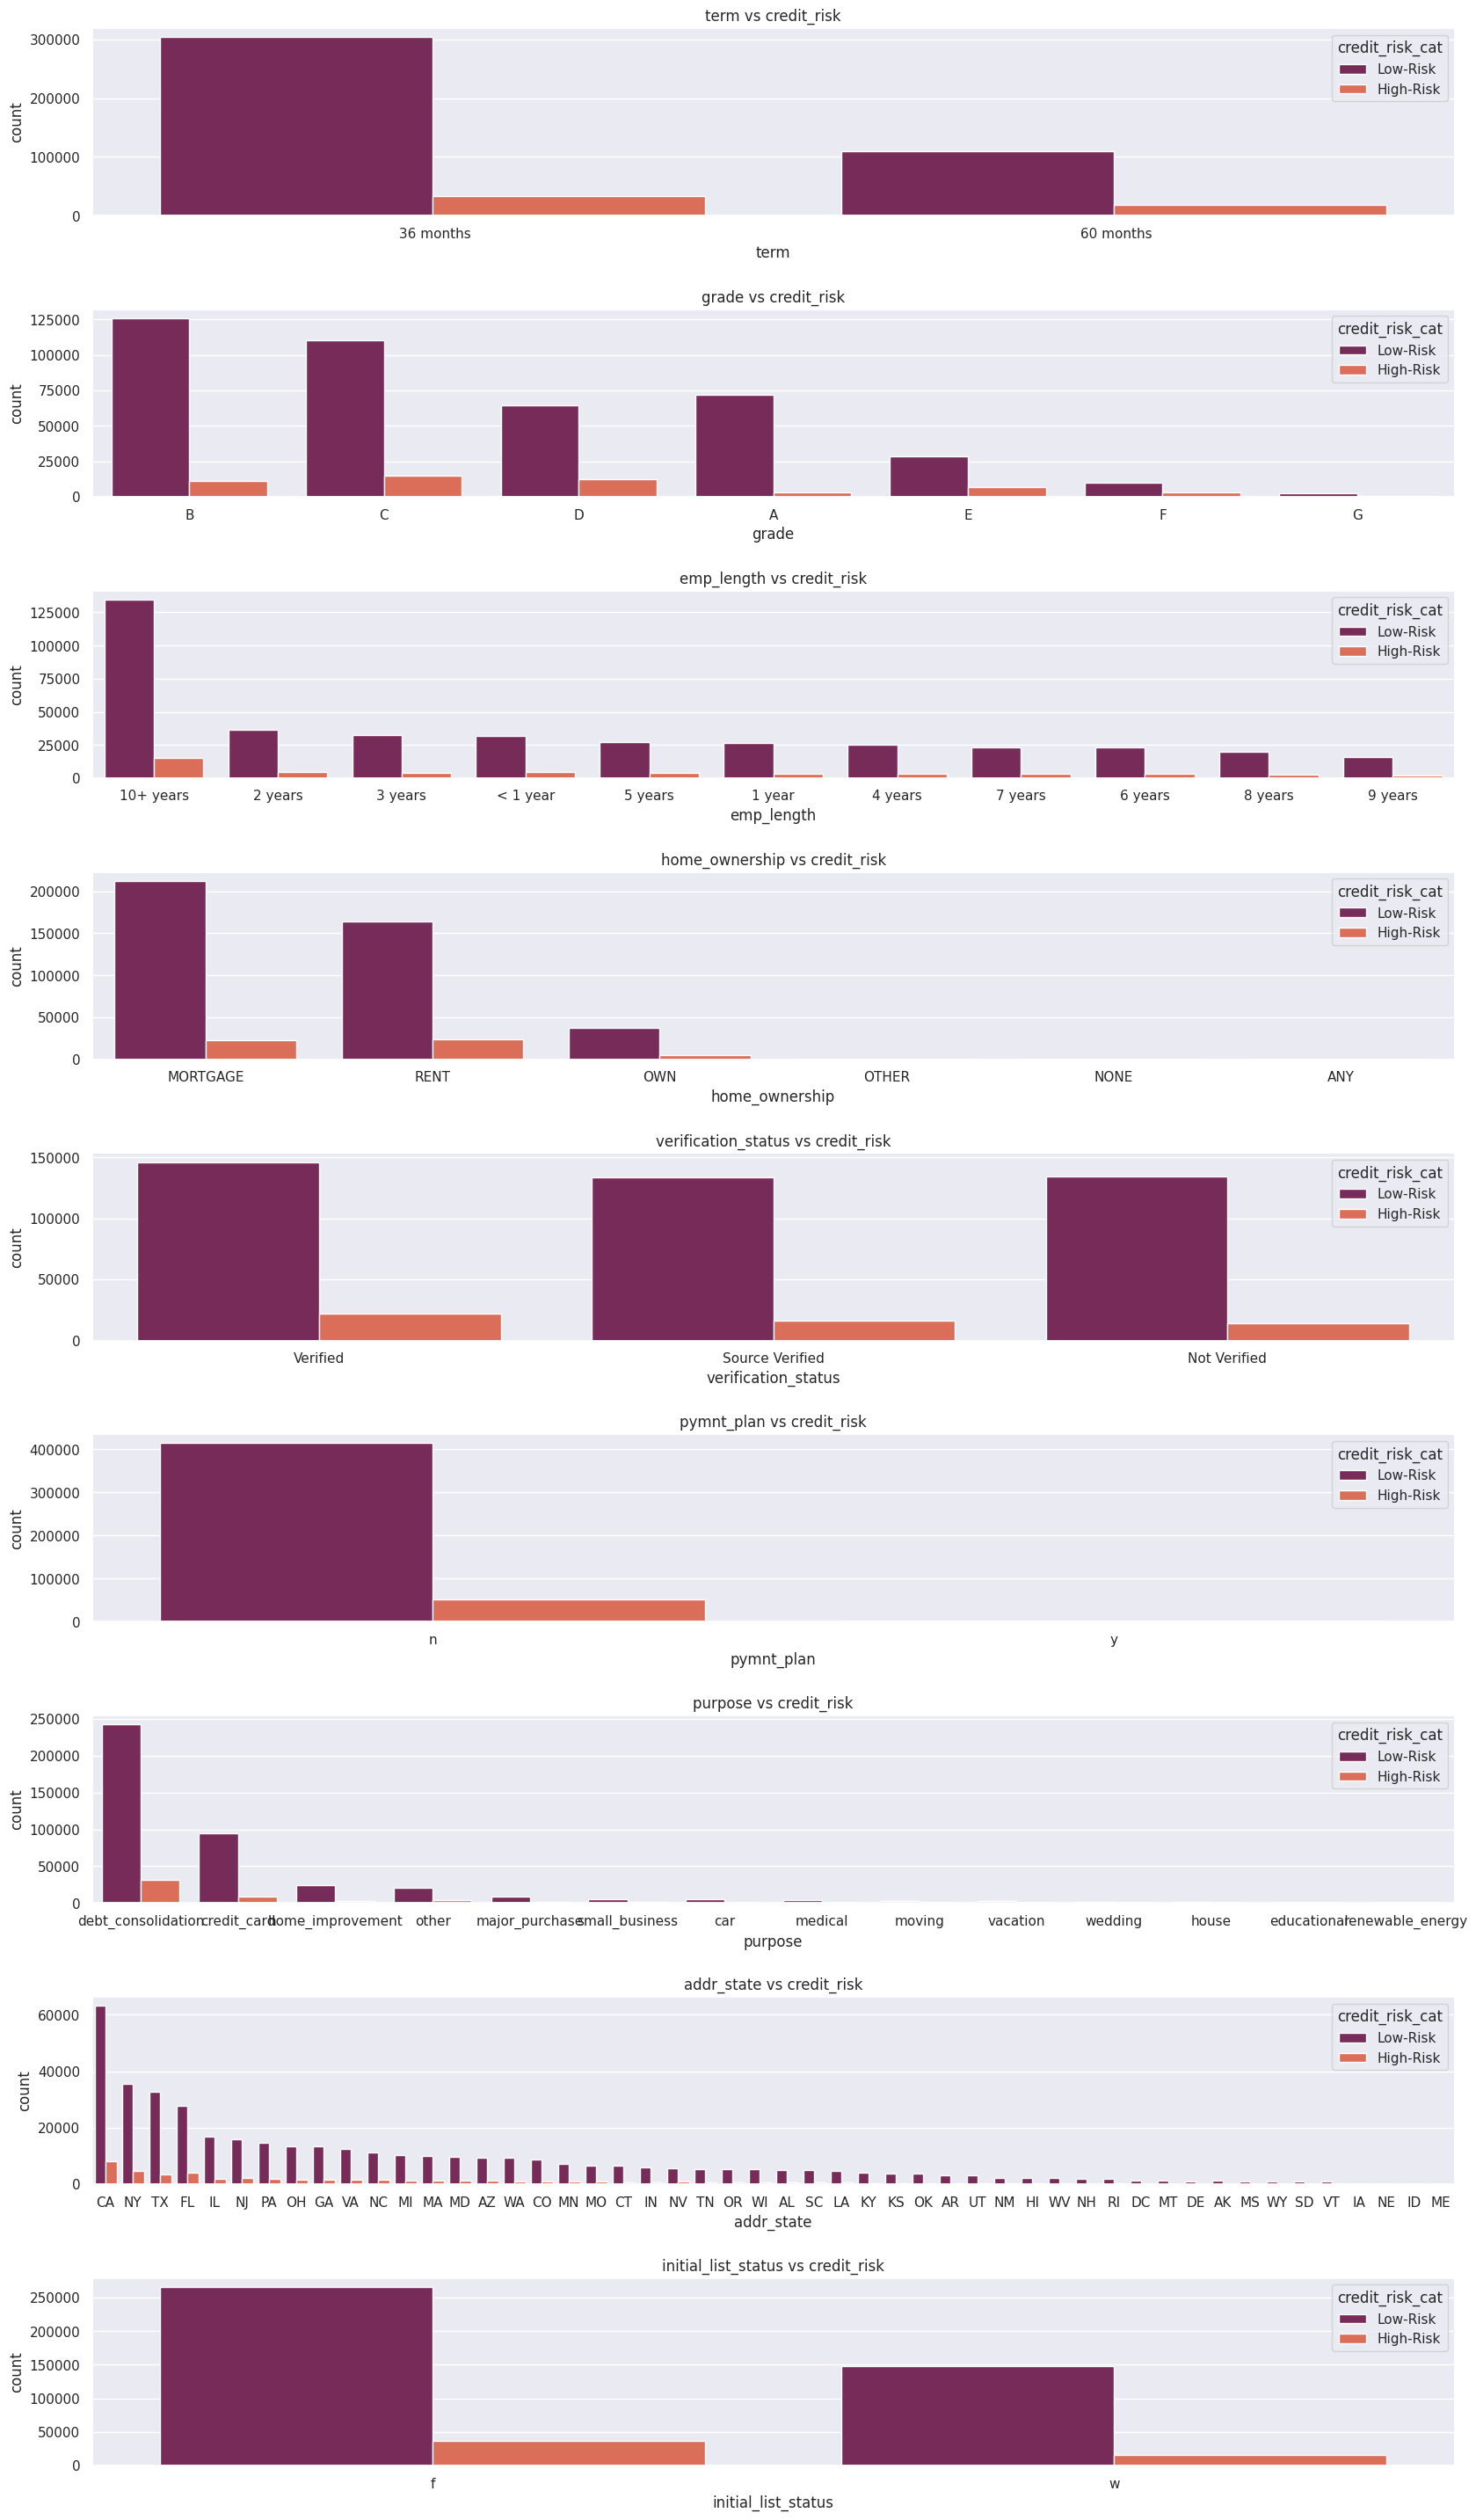

In [23]:
# countplot
n=len(df_eda_cat.columns)
fig, ax = plt.subplots(n,1,figsize=(20,n*4))
for i in range(n):
    col = df_eda_cat.columns[i]
    sorted_counts = df_eda_cat[col].value_counts().sort_values(ascending=False)
    sns.countplot(ax=ax[i],x=df_eda[col], hue=df_eda['credit_risk_cat'],order=sorted_counts.index,palette = palette).set_title(f'{col} vs credit_risk')
plt.subplots_adjust(hspace=0.5)
plt.show()


In [24]:
# Count for each unique values
credit_risk_counts  = {}
n=len(df_eda_cat.columns)
for i in range(n):
    col = df_eda_cat.columns[i]
    counts = df_eda.groupby([col, 'credit_risk_cat']).size().unstack(level=1,fill_value=0)
    credit_risk_counts[col] = counts

# Print the counts for each column
for col, counts in credit_risk_counts.items():
    print(f"Column: {col}")
    print(counts)
    print('-'*50)

Column: term
credit_risk_cat  High-Risk  Low-Risk
term                                
 36 months           33579    304374
 60 months           18607    109725
--------------------------------------------------
Column: grade
credit_risk_cat  High-Risk  Low-Risk
grade                               
A                     2955     71912
B                    11008    125921
C                    14743    110550
D                    12132     64756
E                     7139     28618
F                     3267      9962
G                      942      2380
--------------------------------------------------
Column: emp_length
credit_risk_cat  High-Risk  Low-Risk
emp_length                          
1 year                3386     26236
10+ years            15325    134724
2 years               4647     36726
3 years               4108     32488
4 years               3151     24872
5 years               3611     27163
6 years               3116     22996
7 years               2979     23201
8

From the multivariate analysis of various categorical columns and credit risk, we observe the following patterns:

1. Term: Borrowers with a loan term of '36 months' have a significantly higher count of 'Low-Risk' loans compared to 'High-Risk'. On the other hand, borrowers with a loan term of '60 months' have a higher count of 'High-Risk' loans.

2. Grade: Loans with higher grades (A and B) tend to have a higher count of 'Low-Risk' loans, while lower grades (C, D, E, F, and G) have a higher count of 'High-Risk' loans.

3. Employment Length: Borrowers with an employment length of '10+ years' have a notably higher count of 'Low-Risk' loans, indicating that longer employment experience may be associated with lower credit risk.

4. Home Ownership: Borrowers with 'MORTGAGE' and 'RENT' as their home ownership status have a higher count of both 'Low-Risk' and 'High-Risk' loans, but 'RENT' shows a higher count of 'High-Risk' loans.

5. Verification Status: There is a relatively balanced count of 'Low-Risk' and 'High-Risk' loans for each verification status, with 'Verified' having the highest count of both.

6. Payment Plan: The overwhelming majority of borrowers are on a payment plan marked as 'n' (no payment plan). Only a tiny fraction of borrowers have a payment plan marked as 'y' (indicating some payment plan), and they are classified as 'High-Risk'.

7. Purpose: Loans for the purpose of 'debt_consolidation', 'credit_card', and 'home_improvement' have the highest counts, with 'debt_consolidation' having the highest count of 'Low-Risk' loans.

8. Address State: The distribution of 'credit_risk' varies across different states, with some states having a higher count of 'High-Risk' loans, while others have more 'Low-Risk' loans.

9. Initial List Status: Borrowers with an initial list status of 'f' have a higher count of 'High-Risk' loans compared to those with an initial list status of 'w'.

These insights can be valuable for lenders and financial institutions in assessing the credit risk of borrowers based on different categorical features. The analysis can help them make informed decisions about loan approvals, interest rates, and risk management strategies to ensure a balanced and profitable loan portfolio.

---

# 5 - Feature Engineering

> This section explains the process of preparing data for the model training process, such as handling missing values, splitting data into train-tests, feature selection, data transformation (normalization, encoding, etc.), and other processes needed.

## 5.1 Data Inference

This section explains how to create a data inference. Data inference is distinct from the train and test set, as it is still based on the original dataset and used to evaluate the model's performance on new, raw data. To create the data inference, we will set aside 10 data from the original dataset.

In [25]:
# Creating data inference
inf = df.copy()
df_inf = inf.sample(25, random_state=24).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(25)

size of data inference (rows,columns) :  (25, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,2838,1030248,1259652,12000,12000,12000.000000,36 months,6.62,368.45,A,A2,DHL Express,9 years,MORTGAGE,105000.00,Source Verified,Nov-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1030248,Borrower added on 11/17/11 > Consolidate credit card balances<br>,credit_card,Debt / Credit Cards,925xx,CA,17.83,0.0,Jul-88,0.0,NaN,NaN,14.0,0.0,37059,69.4,48.0,f,0.00,0.00,13082.80000,13082.80,12000.00,1082.80,0.0,0.00,0.0000,Nov-13,4990.14,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26941,561453,722562,4000,4000,4000.000000,36 months,11.12,131.19,B,B3,The Kroger Co.,6 years,RENT,42000.00,Verified,Aug-10,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=561453,NaN,debt_consolidation,Credit Card Debt Consolidation,972xx,OR,13.40,0.0,Oct-03,1.0,33.0,NaN,7.0,0.0,4041,64.1,12.0,f,0.00,0.00,4702.12000,4702.12,4000.00,702.12,0.0,0.00,0.0000,Mar-13,784.09,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28194,543090,700722,24000,24000,23907.682460,36 months,11.12,787.10,B,B3,San Diego Unified School District,7 years,RENT,78708.00,Verified,Jul-10,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=543090,Borrower added on 07/07/10 > This loan is to payoff credit cards to have only one fixed payment a month<br/>,credit_card,Hanna_LendingClub,919xx,CA,15.99,0.0,Oct-99,0.0,NaN,NaN,4.0,0.0,12683,47.5,19.0,f,0.00,0.00,27149.58000,27025.02,23999.94,3149.64,0.0,0.00,0.0000,Jan-12,13833.14,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33975,460240,574244,19400,19400,19368.339510,36 months,16.00,682.06,D,D5,WABC,2 years,MORTGAGE,130000.00,Not Verified,Nov-09,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=460240,574244 added on 11/14/09 > I am trying to consolidate two high interest loans into one payment a month. Believe it or not the 16% interest rate on this loan is lower then what I currently have.<br/>,debt_consolidation,Debt Me Out Of This,070xx,NJ,12.60,1.0,Oct-96,3.0,15.0,NaN,12.0,0.0,8907,26.7,35.0,f,0.00,0.00,21515.03000,21466.03,19400.00,2115.03,0.0,0.00,0.0000,Sep-10,24.19,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36892,396914,437416,11200,11200,2799.990932,36 months,13.16,378.23,C,C3,Active The Limited Inc.,6 years,RENT,63800.00,Verified,May-09,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=396914,"I've been doing recruiting business for 6 years and I finally put my business on track. however, once the business grow, I need cash flow to pay my employees. We normally get paid from clients within 90days, and I need to pay my employees with our money during 90 days. With your lending, it will help my business grow faster! Thank you!!",small_business,Need cash flow for 3 month.,926xx,CA,4.25,

In [26]:
# Saving data inference as .csv file
df_inf.to_csv('data_inference.csv')

In [27]:
# Removing data inference from dataset
df_preprocessing = df_eda.drop(df_inf.index)
print('size of original dataset (rows,columns) :',df.shape)
print('size of dataset after data inference is removed (rows,columns) :',df_preprocessing.shape)
df_preprocessing.head()

size of original dataset (rows,columns) : (466285, 75)
size of dataset after data inference is removed (rows,columns) : (466260, 50)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk,credit_risk_cat
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1,0.0,NaN,NaN,NaN,1,Low-Risk
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,0.0,NaN,NaN,NaN,0,High-Risk
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1,0.0,NaN,NaN,NaN,1,Low-Risk
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1,0.0,NaN,NaN,NaN,1,Low-Risk
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1,0.0,NaN,NaN,NaN,1,Low-Risk


## 5.2 Handling Missing Values

This section contains the process of handling missing values. Handling missing values is an important part of feature engineering because missing data can significantly impact the performance and accuracy of machine learning models.

In [28]:
# Check % of Missing Values
df_preprocessing.isnull().sum()*100/len(df_preprocessing)

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
emp_length                      4.504997
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
purpose                         0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.006220
earliest_cr_line                0.006220
inq_last_6mths                  0.006220
mths_since_last_delinq         53.690216
mths_since_last_record         86.566079
open_acc                        0.006220
pub_rec                         0.006220
revol_bal       

If a column has a high percentage of missing values (e.g., ~50% or more), keeping the column may not provide meaningful insights or may introduce bias in your analysis. In such cases, it might be reasonable to drop the column.

In [29]:
# Drop Columns with Missing Values > ~50%
df_preprocessing = df_preprocessing.drop(['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','next_pymnt_d'],axis=1)

In [30]:
# Separating Numeric and Categorical Data
num_columns_pre = df_preprocessing.select_dtypes(include=np.number).columns.tolist()
cat_columns_pre = df_preprocessing.select_dtypes(include=['object']).columns.tolist()
print('Numeric Columns : ', num_columns_pre)
print('Categorical Columns : ', cat_columns_pre)

Numeric Columns :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_risk']
Categorical Columns :  ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'credit_risk_cat']


### Missing Values - Numeric Features

The technique use to handle missing values for numeric features is by replacing missing values with the mean or median of the available data.

In [31]:
# Number of Missing Values
df_preprocessing[num_columns_pre].isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        4
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
policy_code                       0
acc_now_delinq                   29
tot_coll_amt                

Before imputing the mean/median on a numeric feature with a missing value, it is essential to determine the type of data distribution.

In [32]:
# Distribution of Data
df_pre_num = df_preprocessing[num_columns_pre]
n=len(df_pre_num.columns)

for i in range(n):
    col = df_pre_num.columns[i]
    skewness(df_pre_num,col)

Distribution of loan_amnt : Right Skewed
Distribution of funded_amnt : Right Skewed
Distribution of funded_amnt_inv : Right Skewed
Distribution of int_rate : Normal Distribution
Distribution of installment : Right Skewed
Distribution of annual_inc : Right Skewed
Distribution of dti : Normal Distribution
Distribution of delinq_2yrs : Right Skewed
Distribution of inq_last_6mths : Right Skewed
Distribution of open_acc : Right Skewed
Distribution of pub_rec : Right Skewed
Distribution of revol_bal : Right Skewed
Distribution of revol_util : Normal Distribution
Distribution of total_acc : Right Skewed
Distribution of out_prncp : Right Skewed
Distribution of out_prncp_inv : Right Skewed
Distribution of total_pymnt : Right Skewed
Distribution of total_pymnt_inv : Right Skewed
Distribution of total_rec_prncp : Right Skewed
Distribution of total_rec_int : Right Skewed
Distribution of total_rec_late_fee : Right Skewed
Distribution of recoveries : Right Skewed
Distribution of collection_recovery_

The imputation of features with missing values uses a `SimpleImputer`, and since these features have a skewed data distribution, the imputation employs the **median**.

In [33]:
# Create a SimpleImputer object with the desired strategy (median in this case because the distribution of the data is skewed)
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform the data with the imputed values
pre_num_imputed = imputer.fit_transform(df_pre_num)
df_pre_num = pd.DataFrame(data=pre_num_imputed, columns=df_pre_num.columns)

# Re-check the number of missing values
df_pre_num.isnull().sum()


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
credit_risk                   0
dtype: i

### Missing Values - Categorical Data

The technique use to handle missing values for categorical features is by replacing missing values with the **'Unknown'**.

In [34]:
# Number of Missing Values
df_preprocessing[cat_columns_pre].isnull().sum()

term                       0
grade                      0
emp_length             21005
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
initial_list_status        0
credit_risk_cat            0
dtype: int64

In [35]:
# Fill missing values in specified columns with desired values
df_pre_cat = df_preprocessing[cat_columns_pre]
df_pre_cat = df_pre_cat.fillna({'emp_length': 'Unknown'}).reset_index()
# Re-check the number of missing values
df_pre_cat.isnull().sum()

index                  0
term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
credit_risk_cat        0
dtype: int64

### Concatenate Numeric Data and Categorical Data

Next, the numeric features and categorical features that have undergone missing value handling are concatenated.

In [36]:
# Concatenate Numeric Data and Categorical Data horizontally
df_preprocessed = pd.concat([df_pre_num,df_pre_cat],axis=1)
df_preprocessed.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk,index,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,credit_risk_cat
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,0.0,81539.0,22800.0,1.0,0,36 months,B,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,f,Low-Risk
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,0.0,81539.0,22800.0,0.0,1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,f,High-Risk
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,0.0,81539.0,22800.0,1.0,2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,f,Low-Risk
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,0.0,81539.0,22800.0,1.0,3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,f,Low-Risk
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,0.0,81539.0,22800.0,1.0,4,60 months,B,1 year,RENT,Source Verified,Current,n,other,OR,f,Low-Risk


## 5.3 Splitting dataset into input features (X) and target variable (y)

In this section, we split the dataset into input features (X) and the target variable (y). The `loan_status` feature is dropped because it has the same meaning as the target variable `credit_risk`.

In [37]:
# Defining X and y (removing unnecesary features)
X = df_preprocessed.drop(['loan_status','credit_risk','credit_risk_cat'],axis=1)
y = pd.DataFrame(df_preprocessed['credit_risk'])
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,0.0,81539.0,22800.0,0,36 months,B,10+ years,RENT,Verified,n,credit_card,AZ,f
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,0.0,81539.0,22800.0,1,60 months,C,< 1 year,RENT,Source Verified,n,car,GA,f
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,0.0,81539.0,22800.0,2,36 months,C,10+ years,RENT,Not Verified,n,small_business,IL,f
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,0.0,81539.0,22800.0,3,36 months,C,10+ years,RENT,Source Verified,n,other,CA,f
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,0.0,81539.0,22800.0,4,60 months,B,1 year,RENT,Source Verified,n,other,OR,f


## 5.4 Train-Test Split

Train-test split is a technique used in machine learning to divide a dataset into two separate subsets: a training set and a test set. The purpose of this split is to evaluate the performance of a machine learning model on unseen data. The split ratio is 80-20, where the training set contains the majority of the data (80%), and the test set contains the remaining portion (20%).

In [38]:
# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
210319,20000.0,20000.0,19750.0,12.12,665.44,79000.0,17.86,0.0,0.0,11.0,0.0,19353.0,62.0,19.0,0.00,0.00,23954.91175,23655.50,20000.00,3954.91,0.0,0.0,0.0,667.17,0.0,1.0,0.0,0.0,81539.0,22800.0,210331,36 months,B,9 years,RENT,Not Verified,n,debt_consolidation,FL,f
438079,25000.0,25000.0,24950.0,13.65,577.18,75000.0,20.53,0.0,0.0,11.0,0.0,9006.0,51.5,28.0,0.00,0.00,28552.87000,28495.76,25000.00,3552.87,0.0,0.0,0.0,21626.71,0.0,1.0,0.0,0.0,251132.0,17500.0,438102,60 months,C,9 years,MORTGAGE,Verified,n,debt_consolidation,MN,f
255601,18000.0,18000.0,18000.0,15.59,433.82,90000.0,22.91,0.0,0.0,14.0,0.0,14895.0,64.8,42.0,14951.27,14951.27,6034.50000,6034.50,3048.73,2985.77,0.0,0.0,0.0,433.82,0.0,1.0,0.0,0.0,167318.0,23000.0,255617,60 months,D,< 1 year,MORTGAGE,Not Verified,n,debt_consolidation,AL,w
19382,31050.0,31050.0,31050.0,14.17,1063.79,95000.0,20.53,0.0,1.0,12.0,0.0,12210.0,66.4,27.0,0.00,0.00,36695.73000,36695.73,31050.01,5645.72,0.0,0.0,0.0,16512.91,0.0,1.0,0.0,0.0,81539.0,22800.0,19383,36 months,C,7 years,RENT,Not Verified,n,debt_consolidation,HI,f
182949,17050.0,17050.0,17025.0,22.95,480.16,38000.0,30.51,0.0,0.0,14.0,0.0,28275.0,95.8,33.0,9772.31,9757.97,16304.44000,16280.56,7277.70,9026.74,0.0,0.0,0.0,480.16,0.0,1.0,0.0,0.0,55958.0,29500.0,182961,60 months,F,< 1 year,RENT,Verified,n,debt_consolidation,NJ,w


## 5.5 Feature Selection

Feature selection is a process in machine learning and data analysis that involves choosing a subset of relevant and significant features (input variables) from the original set of features. The objective of feature selection is to improve the performance of a model by selecting only the most important and informative features while discarding irrelevant or redundant ones. Feature selection will use the `SelectKBest` library to select the **top 10 most important features** from a dataset.

In [39]:
# feature selection using K-Means from Scikit Learn Library

# Using LabelEncoder to convert categorical into numeric data
X_train_features = X_train.copy()
cat_col = X.select_dtypes(include=['object']).columns.tolist()
m_LabelEncoder = LabelEncoder()

for col in X_train_features[cat_col]:
    X_train_features[col]=m_LabelEncoder.fit_transform(X_train_features[col])

# Create a feature selector (SelectKBest) with the desired number of features to keep (10)
num_features_to_keep = 10
selector = SelectKBest(score_func=f_classif, k=num_features_to_keep)

# Fit the feature selector on the training data and transform both training and test data
x_train_selected = selector.fit_transform(X_train_features, y_train)
x_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features: ", selected_feature_names)

Selected Features:  Index(['int_rate', 'out_prncp', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'grade'],
      dtype='object')


In [40]:
# Features with the highest score
x_train_featured_df = pd.DataFrame(X_train_features, columns=X_train_features.columns)
df_scores = pd.DataFrame({'Feature': x_train_featured_df.columns,
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(2)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores.head(10)


,Feature,Score,p-value
21,recoveries,86674.231391,0.0
22,collection_recovery_fee,35585.405150,0.0
18,total_rec_prncp,25899.908712,0.0
17,total_pymnt_inv,14765.754963,0.0
16,total_pymnt,14685.100036,0.0
3,int_rate,11870.285791,0.0
23,last_pymnt_amnt,11134.537226,0.0
32,grade,10969.509897,0.0
20,total_rec_late_fee,8708.181787,0.0
14,out_prncp,8633.541117,0.0


Basen on the table above the selected features are `int_rate`, `out_prncp`, `total_pymnt`, `total_pymnt_inv`,
       `total_rec_prncp`, `total_rec_late_fee`, `recoveries`,
       `collection_recovery_fee`, `last_pymnt_amnt`, `grade`.

In [41]:
# Selected Features
sel_features = ['int_rate', 'out_prncp', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'grade']
X_train = X_train[sel_features]
X_test = X_test[sel_features]

## 5.6 Feature Scaling and Encoding

Feature scaling and encoding are common preprocessing steps in feature engineering. The ColumnTransformer can be used to apply both feature scaling and feature encoding to different subsets of columns in a dataset.

`ColumnTransformer` is a powerful feature in scikit-learn that allows you to apply different preprocessing steps to different subsets of columns in your dataset. It is often used in machine learning pipelines to handle different data types and apply specific transformations to each subset of columns.

The `ColumnTransformer` takes a list of transformers, where each transformer is applied to a specific set of columns. It allows you to define different preprocessing steps for numerical columns, categorical columns, or any other subsets of columns in your dataset.

Feature scaling for numeric features will be using `MinMaxScaler` because the data distribution is skewed. Feature encoding for categorical features will be using `OneHotEncoder` for categorical data.


In [42]:
# Numeric and Categorical Features
num_col_features = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [43]:
# Preprocess features
preprocess = ColumnTransformer([
    ('num', MinMaxScaler(),num_col_features),
    ('cat', OneHotEncoder(drop='first'),cat_col_features)
])

---

# 6 - Model Definition

> This section explains the process of specifying the architecture of a machine learning model.

Creating a pipeline during model definition is a powerful technique in machine learning that involves combining multiple steps into a single unified workflow. A pipeline allows you to chain together various data preprocessing and modeling steps, ensuring that the entire process is seamless and streamlined. It simplifies the process of training and evaluating the model and improves code readability and maintainability.

A pipeline with resampling and classification steps allows you to apply resampling techniques before feeding the data to the classification algorithm. It helps in automating the process and ensures that the resampling is consistently applied during cross-validation and testing.

When dealing with imbalanced datasets, standard classification algorithms can be biased towards the majority class and may not perform well in predicting the minority class. Resampling techniques are used to address this issue by either increasing the number of samples in the minority class (oversampling) or decreasing the number of samples in the majority class (undersampling).

The `RandomOverSampler` is one of the resampling techniques commonly used to address class imbalance in binary or multiclass classification tasks. It is used when the minority class (the class with fewer instances) is underrepresented, and the goal is to balance the class distribution by increasing the number of instances in the minority class.

The classification algorithms that will be used are :
1. Logistic Regression

Logistic Regression is a popular and widely used classification algorithm for several reasons:

  - **Simplicity**: Logistic Regression is a straightforward and easy-to-understand algorithm. It is based on the logistic function, which maps input features to probabilities between 0 and 1, making it interpretable and suitable for binary classification problems.

  - **Efficiency**: Logistic Regression is computationally efficient and can handle large datasets with a relatively low computational cost compared to more complex algorithms.

2. Decision Tree

The advantage of Using Decision Trees as a classification algorithm:
  - **Robustness to Outliers** : Decision Trees are less affected by outliers compared to some other algorithms like linear models.


In [44]:
# Logistic Regression - create a pipeline with resampling and classification steps
pipeline_logreg = Pipeline([
    ('preprocessor', preprocess),            # Step 1: Feature Preprocessing
    ('resampler', RandomOverSampler()),       # Step 2: Resampling to handle class imbalance
    ('logregclassifier', LogisticRegression(random_state=42)),     # Step 3: Classification algorithm
])

In [45]:
# Decision Tree - create a pipeline with resampling and classification steps
pipeline_dectree = Pipeline([
    ('preprocessor', preprocess),
    ('resampler', RandomOverSampler()),
    ('dectreeclassifier', DecisionTreeClassifier(random_state=42)),
])

---

# 7 - Model Training and Model Evaluation

> This section explain the process of model training and evaluating the model.

## 7.1 Cross-Validation

Cross-validation is a statistical technique used during the model training process to assess how well a machine learning algorithm generalizes to unseen data. It involves partitioning the available dataset into multiple subsets, called folds, and using each fold alternately as a training set and a validation set. The model is trained and evaluated multiple times, and the average performance across all iterations is used as the final evaluation metric.

The main purpose of cross-validation is to avoid overfitting, which occurs when a model performs well on the training data but poorly on unseen data. By using cross-validation, we can obtain a more robust estimate of the model's performance and gain insights into its generalization capabilities.

The most commonly used cross-validation technique is k-fold cross-validation, where the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold serving as the validation set once. The final evaluation metric is the average of the performance measures obtained from all k iterations.

### a. Cross-Validation - Logistic Regression

In [46]:
# Cross Validation using `cross_val_score` for train set
cv_lr = cross_val_score(pipeline_logreg,
                                  X_train,
                                  y_train,
                                  cv=5,
                                  scoring='accuracy')

print("accuracy Score - All - Cross Validation  :", cv_lr)
print("accuracy Score - Mean - Cross-Validation :", cv_lr.mean())
print("accuracy Score - Std - Cross-Validation  :", cv_lr.std())

accuracy Score - All - Cross Validation  : [0.83934747 0.83862363 0.84019195 0.84002895 0.83657056]
accuracy Score - Mean - Cross-Validation : 0.8389525122637714
accuracy Score - Std - Cross-Validation  : 0.001313987243010709


### b. Cross-Validation - Decision Tree

In [47]:
# Cross Validation using `cross_val_score` for train set
cv_dt = cross_val_score(pipeline_dectree,
                                  X_train,
                                  y_train,
                                  cv=5,
                                  scoring='accuracy')

print("accuracy Score - All - Cross Validation  :", cv_dt)
print("accuracy Score - Mean - Cross-Validation :", cv_dt.mean())
print("accuracy Score - Std - Cross-Validation  :", cv_dt.std())

accuracy Score - All - Cross Validation  : [0.96374092 0.96465242 0.963379   0.96520154 0.96435705]
accuracy Score - Mean - Cross-Validation : 0.9642661847097532
accuracy Score - Std - Cross-Validation  : 0.0006473527091377685


In [48]:
# Model Comparision based on Cross-Validation Score
crossval = [cv_lr,cv_dt]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression','Decision Tree']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Algorithm Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Algorithm Model,Mean,Std
0,Decision Tree,0.964,0.001
1,Logistic Regression,0.839,0.001


Based on the cross-validation score, the **Decision Tree** algorithm has the highest mean score (0.964) and the lowest standard deviation score (0.000).
Next, model evaluation is conducted using this algorithm.

In [49]:
# Best Model - Baseline Parameter
best_model = pipeline_dectree

# Fitting XGBoost Classifier model - Baseline Parameter
best_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['int_rate', 'out_prncp',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'total_rec_late_fee',
                                                   'recoveries',
                                                   'collection_recovery_fee',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['grade'])])),
                ('resampler', RandomOverSampler()),
                ('dectreeclassifier', DecisionTreeClassifier(random_state=42))])

## 7.2 Model Evaluation - Baseline Parameters

Model evaluation is conducted using the selected algorithm.

---------Classification Report (Train Set) - ---------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     41746
         1.0       1.00      1.00      1.00    331262

    accuracy                           1.00    373008
   macro avg       0.98      1.00      0.99    373008
weighted avg       1.00      1.00      1.00    373008



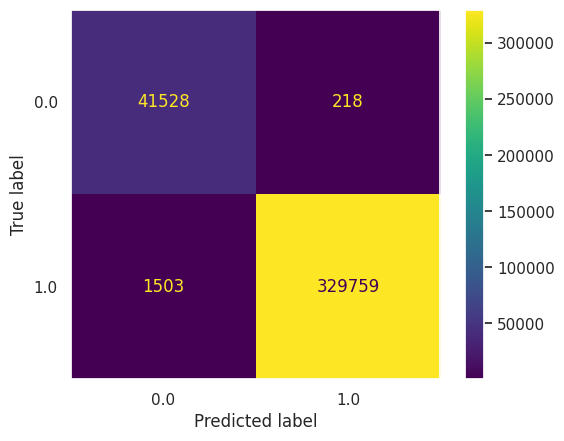

In [50]:
# Predicting target (y_train and y_test)
y_pred_train_baseline = best_model.predict(X_train)
y_pred_test_baseline = best_model.predict(X_test)

# Creating target prediction dataframe
y_pred_train_baseline = pd.DataFrame(data = y_pred_train_baseline, columns = ["Prediction Train"])
y_pred_test_baseline = pd.DataFrame(data = y_pred_test_baseline, columns = ["Prediction Test"])

# Determining classification report for train set
print('---------Classification Report (Train Set) - ---------')
print(classification_report(y_train,y_pred_train_baseline))

# Creating confusion matrix for train set
cm = confusion_matrix(y_train, y_pred_train_baseline, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     10437
         1.0       0.98      0.98      0.98     82815

    accuracy                           0.96     93252
   macro avg       0.91      0.91      0.91     93252
weighted avg       0.96      0.96      0.96     93252



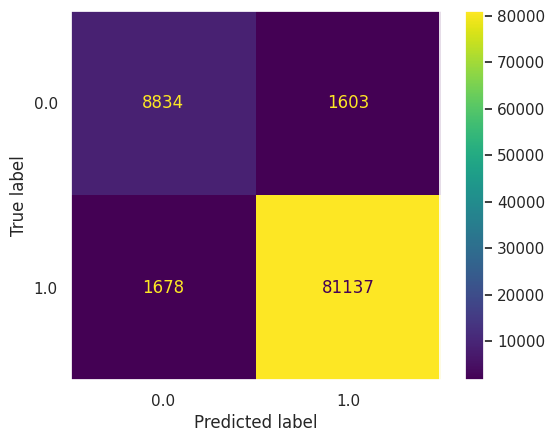

In [51]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test,y_pred_test_baseline))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_pred_test_baseline, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

From the classification report above, we can observe the following insights:

1. **Precision:**
  For class 0.0 (high risk), the precision is 0.84, which means that 84% of the predicted high-risk loans are actually high-risk. For class 1.0 (low risk), the precision is 0.98, indicating that 98% of the predicted low-risk loans are correctly classified.

2. **Recall:**
  The recall for both classes is high, with 0.85 for class 0.0 (high risk) and 0.98 for class 1.0 (low risk). This implies that the model is effective in capturing a high percentage of actual high-risk and low-risk loans.

3. **F1-score:**
  The F1-score, which is the harmonic mean of precision and recall, is 0.84 for class 0.0 and 0.98 for class 1.0. This demonstrates a good balance between precision and recall for both classes.

4. **Accuracy:**
  The overall accuracy of the model on the test set is 0.96, indicating that it correctly classifies 96% of the loans in the test set.

Overall, the model performs well in distinguishing between high-risk and low-risk borrowers, with high precision, recall, and accuracy.

## 7.3 Hyperparameter Tuning

Next hyperparameter tuning is carried out using the selected algorithm. The goal is to find the set of hyperparameters that yield the best performance, usually measured by metrics like accuracy, precision, recall, and  F1-score.

In [52]:
# Define the hyperparameter grid for Grid Search
param_grid = {
    'dectreeclassifier__criterion': ['gini', 'entropy'],          # Function to measure the quality of a split
    'dectreeclassifier__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'dectreeclassifier__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'dectreeclassifier__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Create the Grid Search object
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the Grid Search
best_est = grid_search.best_estimator_

# Get the best hyperparameters found during the Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'dectreeclassifier__criterion': 'entropy', 'dectreeclassifier__max_depth': 20, 'dectreeclassifier__min_samples_leaf': 1, 'dectreeclassifier__min_samples_split': 5}


## 7.4 Model Evaluation - GridSearch

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     41746
         1.0       0.99      0.99      0.99    331262

    accuracy                           0.98    373008
   macro avg       0.95      0.95      0.95    373008
weighted avg       0.98      0.98      0.98    373008

Confusion Matrix Train Set


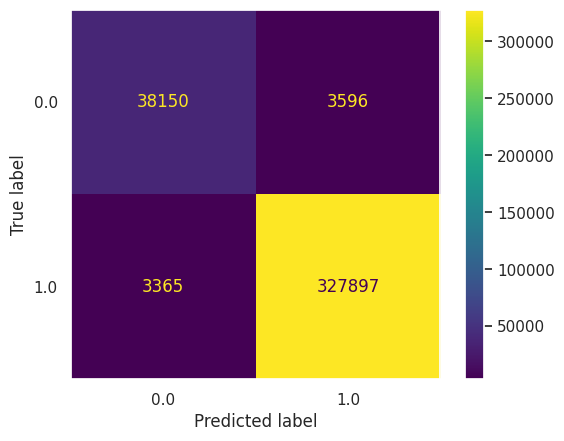

In [53]:
# Predicting target (y_train and y_test) with Best Estimator
y_pred_train_grid = best_est.predict(X_train)
y_pred_test_grid = best_est.predict(X_test)

# Creating confusion matrix for train set
print('Classification Report : \n', classification_report(y_train, y_pred_train_grid))
print('Confusion Matrix Train Set')
cm = confusion_matrix(y_train, y_pred_train_grid, labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     10437
         1.0       0.98      0.98      0.98     82815

    accuracy                           0.97     93252
   macro avg       0.92      0.92      0.92     93252
weighted avg       0.97      0.97      0.97     93252



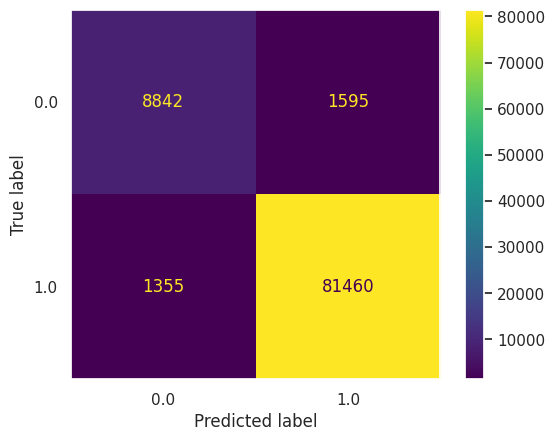

In [54]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test,y_pred_test_grid))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_pred_test_grid, labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [55]:
# Save Classification Report into a Dictionary
all_reports_hyper = {}
score_reports_baseline = {
    'train - precision' : round(precision_score(y_train, y_pred_train_baseline),3),
    'train - recall' : round(recall_score(y_train, y_pred_train_baseline),3),
    'train - accuracy' : round(accuracy_score(y_train, y_pred_train_baseline),3),
    'train - f1_score' : round(f1_score(y_train, y_pred_train_baseline),3),
    'test - precision' : round(precision_score(y_test, y_pred_test_baseline),3),
    'test - recall' : round(recall_score(y_test, y_pred_test_baseline),3),
    'test - accuracy' : round(accuracy_score(y_test, y_pred_test_baseline),3),
    'test - f1_score' : round(f1_score(y_test, y_pred_test_baseline),3),
}
all_reports_hyper['baseline'] = score_reports_baseline

score_reports_grid = {
    'train - precision' : round(precision_score(y_train, y_pred_train_grid),3),
    'train - recall' : round(recall_score(y_train, y_pred_train_grid),3),
    'train - accuracy' : round(accuracy_score(y_train, y_pred_train_grid),3),
    'train - f1_score' : round(f1_score(y_train, y_pred_train_grid),3),
    'test - precision' : round(precision_score(y_test, y_pred_test_grid),3),
    'test - recall' : round(recall_score(y_test, y_pred_test_grid),3),
    'test - accuracy' : round(accuracy_score(y_test, y_pred_test_grid),3),
    'test - f1_score' : round(f1_score(y_test, y_pred_test_grid),3),
}
all_reports_hyper['GridSearchCV'] = score_reports_grid

# create dataframe
pd.DataFrame(all_reports_hyper)

,baseline,GridSearchCV
train - precision,0.999,0.989
train - recall,0.995,0.990
train - accuracy,0.995,0.981
train - f1_score,0.997,0.989
test - precision,0.981,0.981
test - recall,0.980,0.984
test - accuracy,0.965,0.968
test - f1_score,0.980,0.982


Based on these results, the **GridSearchCV** model has slightly higher accuracy, precision, recall, and F1-score on the testing set, indicating better overall performance compared to the baseline model. Therefore, the **GridSearchCV** model is considered better in this comparison.


In [56]:
# Best model
best_model = best_est

We can gather the following insights from model evaluation:
The classification report evaluates the performance of a model on a test set. The model achieves high accuracy (97%) in correctly classifying cases. It demonstrates strong precision, recall, and F1-scores for both high-risk (class 0.0) and low-risk (class 1.0) borrowers. However, the class imbalance may affect sensitivity to the high-risk class. While the model generalizes well, there is a need for further validation on unseen data to address potential overfitting. Interpretability and contextual understanding of predictions should be considered, and problem context may need refinement for accurate risk level representation.

---

# 8 - Model Saving

> This section explains the process of saving the model and other files related to the results of the models that we created in the previous section.

In [57]:
# Saving Model Files
with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(best_model, file_1)

with open('sel_features.txt', 'w') as file_2:
  json.dump(sel_features, file_2)

with open('low_risk.txt', 'w') as file_3:
  json.dump(low_risk, file_3)

---

# 9 - Model Inference
> This section explain the process of model inference.

Model inference, also known as model prediction or model testing, is the process of using a trained machine learning model to make predictions on new, unseen data. Once a model is trained on a labeled dataset, it learns patterns and relationships from the data that can be used to make predictions on new, previously unseen instances.

In this project, model inference is performed in a different notebook.



Model Inference Notebook: https://github.com/ahmadluay9/Credit-Risk-Prediction/blob/main/Inference_credit_risk_prediction.ipynb

- **Summary**

The credit risk predictions made by the model seem to align well with the actual credit risk status for the majority of the data points, indicating a reasonable performance of the classification model.

---

# 10 - Conclusion and Recommendation

1. Based on Exploratory Data Analysis (EDA) :

  - The dataset's `credit_risk` column shows an imbalanced class distribution, with a higher number of borrowers categorized as Low risk compared to High risk borrowers.
  - The minimum `total received principal` is 0.00, indicating loans that have not received any principal payments yet. The maximum `total received principal` is 35,000.03, suggesting significant repayments for some loans.
  - The most common loan `grade` is 'B', followed closely by 'C'. This suggests that the majority of borrowers fall into the 'B' and 'C' risk categories, which might indicate that the lending platform is relatively cautious in offering loans to higher-risk borrowers (grades D to G).
  - The `earliest credit line` available in the dataset dates back to January 1969, indicating that the lending platform serves borrowers with a wide range of credit histories, including those with a long credit history. This diversity in credit histories might contribute to the platform's ability to cater to borrowers with varying creditworthiness.
  - Borrowers with an `employment length` of '10+ years' have a notably higher count of 'Low-Risk' loans, indicating that longer employment experience may be associated with lower credit risk.

2. Based on Model Evaluation:

  - The Selected model is **Decision Tree model has been improved with Hyperparameter Tuning using GridSearch**. The classification report evaluates the performance of a model on a test set. The model achieves high accuracy (97%) in correctly classifying cases. It demonstrates strong precision, recall, and F1-scores for both high-risk (class 0.0) and low-risk (class 1.0) borrowers. However, the class imbalance may affect sensitivity to the high-risk class. While the model generalizes well, there is a need for further validation on unseen data to address potential overfitting. Interpretability and contextual understanding of predictions should be considered, and problem context may need refinement for accurate risk level representation.

3. Business Insights:
  - The analysis reveals that the average recoveries and collection recovery fees are relatively low on average. The lending platform could explore ways to enhance recovery efforts for loans that are deemed High-risk. Implementing effective collection strategies, collaborating with collection agencies, or offering more favorable payment options to struggling borrowers could help in reducing default rates and improving overall profitability.
  - Understanding the distribution of loans across different grades highlights that most borrowers are in the 'B' and 'C' risk categories. This implies that the lending platform might be more conservative in offering loans to higher-risk borrowers. To potentially increase lending opportunities and overall revenue, the platform could assess the possibility of expanding its offerings to include higher-grade loans or exploring ways to mitigate risks effectively for lower-grade loans.

4. Further Improvement:
  - Try another classification model like gradient boosting i.e AdaBoost and XGBoost